In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [23]:
# Functions for plotting, linear regression fit line for convergence

def reference_line_func(h_values, scaling_factor, slope):

    return scaling_factor * h_values ** slope

def fit_reference_line(h_values, error_values):

    popt, _ = curve_fit(reference_line_func, h_values, error_values, p0=[1, 1])

    scaling_factor, slope = popt
    return scaling_factor, slope

In [24]:
df = pd.read_csv('all_simulation_results.csv')

In [25]:
h_list = df['hmax'].unique()
order_list = df['order'].unique()
Cw_list = df['C_w'].unique()
nDof_list = df['ndof'].unique()

print(h_list)
print(order_list)
print(Cw_list)
print(nDof_list)

[0.1767767  0.08838835 0.04419417 0.02209709]
[1 2 3 4 5]
[ 1.          1.58489319  2.51188643  3.98107171  6.30957344 10.
 15.84893192 25.11886432 39.81071706 63.09573445]
[   78   214   422   702  1054   282   794  1594  2682  4058  1050  3034
  6170 10458 15898  4026 11834 24250 41274 62906]


Created CSV for the plot: plot_data_h0.1767766952966369_L2_error_u.csv


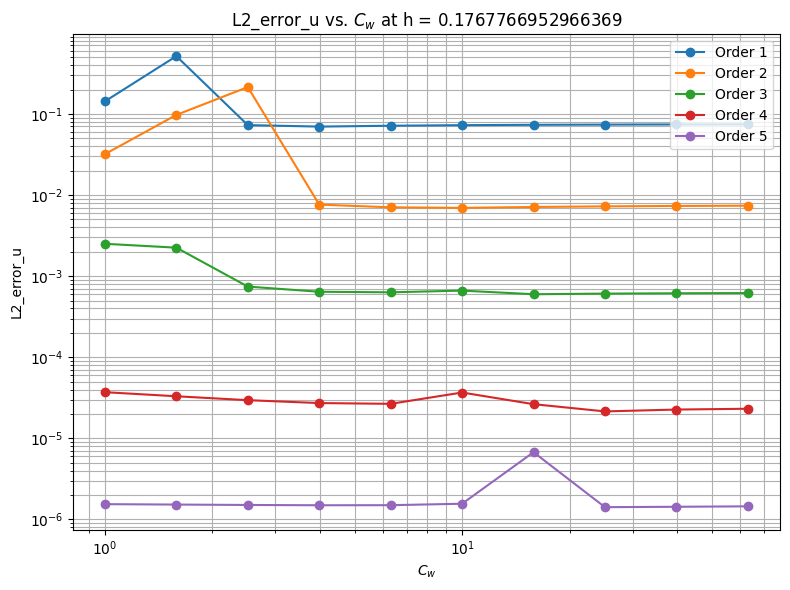

In [26]:
h_value   = h_list[0]
error_col = "L2_error_u"
df_plot = df[df['hmax'] == h_value].copy()
df_plot.sort_values(by=["order", "C_w"], inplace=True)

csv_filename = f"plot_data_h{h_value}_{error_col}.csv"
df_plot.to_csv(csv_filename, index=False)
print(f"Created CSV for the plot: {csv_filename}")

plt.figure(figsize=(8, 6))

# Loop over each unique polynomial order, plotting one line per order
for order_val in sorted(df_plot['order'].unique()):
    subset = df_plot[df_plot['order'] == order_val]
    
    plt.plot(
        subset['C_w'], 
        subset[error_col], 
        marker='o', 
        label=f"Order {order_val}"
    )

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$C_w$")
plt.ylabel(error_col)
plt.title(f"{error_col} vs. $C_w$ at h = {h_value}")
plt.grid(True, which='both', axis='both')
plt.legend()
plt.tight_layout()
plt.show()